In [1]:
import numpy as np

from planning_utils import a_star, a_star_nesw, heuristic, create_grid, prune_path
from frame_utils import global_to_local

# set target altitude and safety distance
TARGET_ALTITUDE = 5
SAFETY_DISTANCE = 5

# Read lat0, lon0 from colliders into floating point values
first_row = np.loadtxt('colliders.csv', delimiter=',', dtype='str', usecols=(0,1))[0]
lat0 = float(first_row[0][5:])
lon0 = float(first_row[1][5:])
global_home = (lon0, lat0, 0.)

print('Lattitude: {}, Longitude: {}'.format(lat0, lon0))
print('Global Home Position: {}'.format(global_home))

Lattitude: 37.79248, Longitude: -122.39745
Global Home Position: (-122.39745, 37.79248, 0.0)


In [2]:
# starting position from simulator
global_position = (-122.397450, 37.792480, 0.)

# convert to local N, E coordinates
local_north, local_east, _ = global_to_local(global_position, global_home)

# read in obstacle map
data = np.loadtxt('colliders.csv', delimiter=',', dtype='Float64', skiprows=2)

# define a grid for a particular altitude and safety margin around obstacles
grid, north_offset, east_offset = create_grid(data, TARGET_ALTITUDE, SAFETY_DISTANCE)

# convert grid start position to current local position
grid_start_north = int(np.round(local_north - north_offset))
grid_start_east = int(np.round(local_east - east_offset))
grid_start = (grid_start_north, grid_start_east)

print("North Offset = {0}, east offset = {1}".format(north_offset, east_offset))
print("Grid Start: {}".format(grid_start))

North Offset = -316, east offset = -445
Grid Start: (316, 445)


In [11]:
# set goal as some arbitrary position on the grid
while True: 
    rand_goal_n = int(np.random.randint(0.2*grid.shape[1], 0.8*grid.shape[0]))
    #rand_goal_n = rand_goal_n - 1
    rand_goal_e = int(np.random.randint(0.2*grid.shape[1], 0.8*grid.shape[1]))
    if grid[rand_goal_n][rand_goal_e] == 0:
        grid_goal = (rand_goal_n, rand_goal_e)
        break
        
print("Grid Goal: {}".format(grid_goal))

Grid Goal: (732, 314)


Found a path.


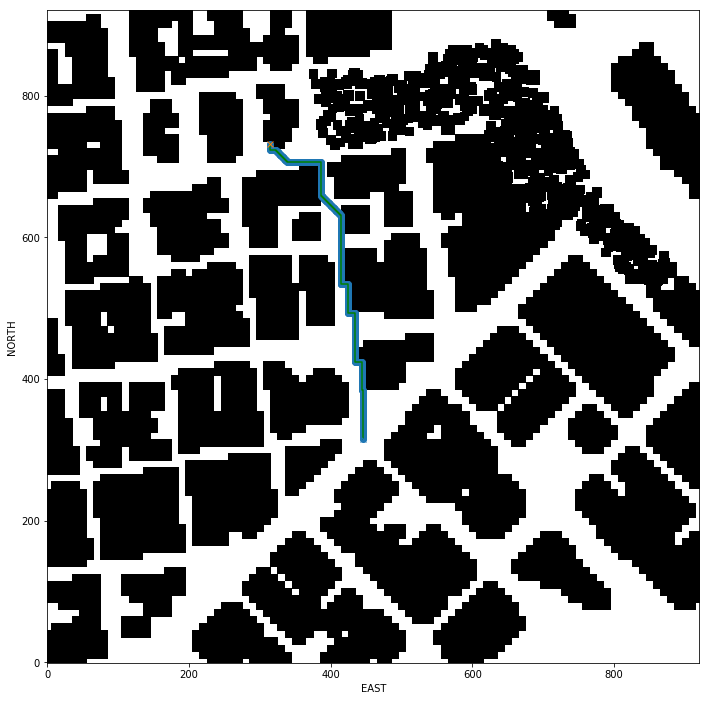

In [14]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 12, 12

# run a* to find path (only N,E,S,W directions)
path_nesw, _ = a_star_nesw(grid, heuristic, grid_start, grid_goal)

if path_nesw is not None:
    pp = np.array(path_nesw)
    plt.plot(pp[:, 1], pp[:, 0], 'g')
    plt.scatter(pp[:, 1], pp[:, 0])
    
plt.plot(grid_start[1], grid_start[0], 'x')
plt.plot(grid_goal[1], grid_goal[0], 'x')
    
plt.imshow(grid, cmap='Greys', origin='lower')
plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

Found a path.


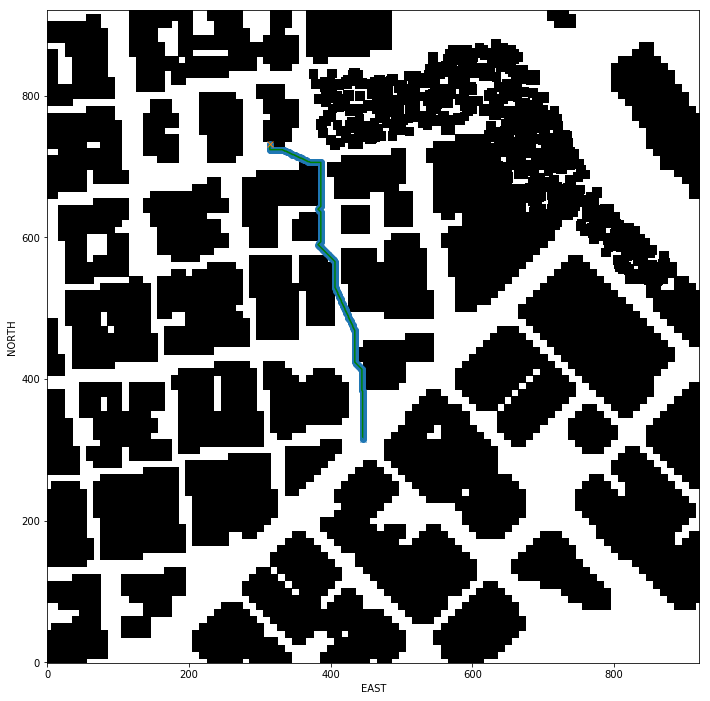

In [49]:
# run a* to find path (including diagonal directions)
path, _ = a_star(grid, heuristic, grid_start, grid_goal)

if path is not None:
    pp = np.array(path)
    plt.plot(pp[:, 1], pp[:, 0], 'g')
    plt.scatter(pp[:, 1], pp[:, 0])
    
plt.plot(grid_start[1], grid_start[0], 'x')
plt.plot(grid_goal[1], grid_goal[0], 'x')
    
plt.imshow(grid, cmap='Greys', origin='lower')
plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

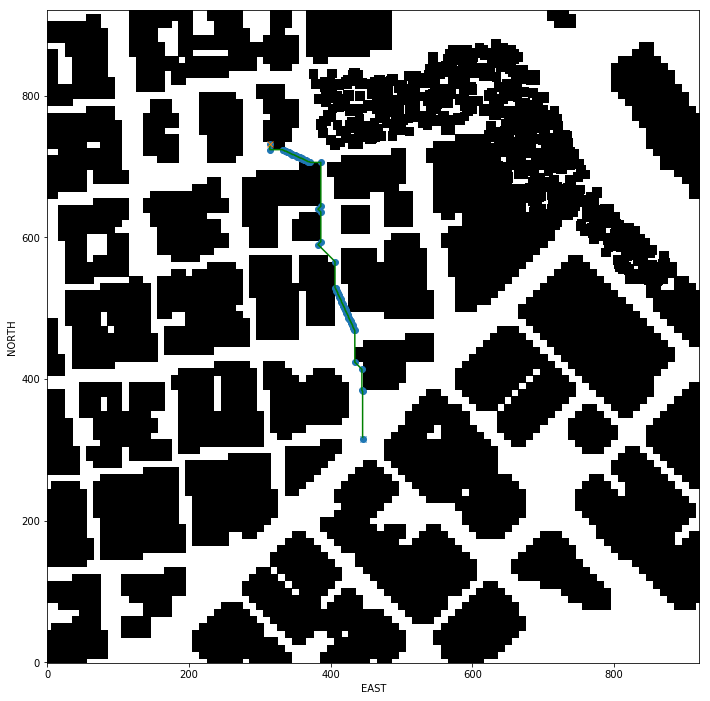

In [16]:
# prune path to minimize number of waypoints (done)
pruned_path = prune_path(path, epsilon=1e-2)

if pruned_path is not None:
    pp = np.array(pruned_path)
    plt.plot(pp[:, 1], pp[:, 0], 'g')
    plt.scatter(pp[:, 1], pp[:, 0])
    
plt.plot(grid_start[1], grid_start[0], 'x')
plt.plot(grid_goal[1], grid_goal[0], 'x')
    
plt.imshow(grid, cmap='Greys', origin='lower')
plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

In [17]:
print("Path length: {} vs. pruned path length: {}.".format(len(path), len(pruned_path)))

Path length: 471 vs. pruned path length: 106.


In [47]:
from bresenham import bresenham

if path is not None:
    pruned_path_bres = [path[0]]
    s, f = 0, 2
    
    while f < len(path):
        cells = list(bresenham(path[s][0], path[s][1], path[f][0], path[f][1]))
        obstacle = False
        for c in cells:
            if grid[c] == 1:
                obstacle = True
                break
        if obstacle == True:
            pruned_path_bres.append(path[f-1])
            s = f - 1
        
        f = f + 1
    pruned_path_bres.append(path[-1])       

print(pruned_path_bres)

[(316, 445), (430, 434), (566, 406), (637, 385), (653, 386), (706, 386), (724, 314), (732, 314)]


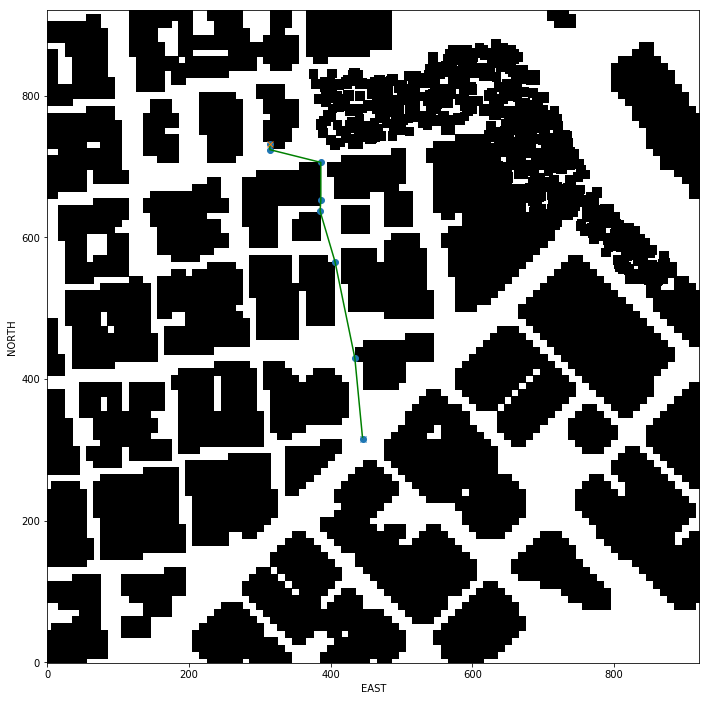

In [48]:
if pruned_path_bres is not None:
    pp = np.array(pruned_path_bres)
    plt.plot(pp[:, 1], pp[:, 0], 'g')
    plt.scatter(pp[:, 1], pp[:, 0])
    
plt.plot(grid_start[1], grid_start[0], 'x')
plt.plot(grid_goal[1], grid_goal[0], 'x')
    
plt.imshow(grid, cmap='Greys', origin='lower')
plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()